<a href="https://colab.research.google.com/github/MUHAMMAD-SULEMAN-10/Machine-Learning-WP-Skills/blob/main/Smote_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SMOTE(Synthetic Minority Oversampling Technique)

SMOTE (Synthetic Minority Over-sampling Technique) is a technique used in machine learning to address imbalanced datasets where the minority class has significantly fewer instances than the majority class. SMOTE involves generating synthetic instances of the minority class by interpolating between existing instances.

# Imagine you have very few samples of the minority class.

Instead of copying them (oversampling),
SMOTE creates new samples by looking at existing minority points and generating new points between them.

It does this by:

Picking a minority class sample

Finding its nearest neighbors (also minority class)

Creating a new sample somewhere between them

So it makes "similar but slightly different" examples.

In [ ]:
# now first we will make a classification dataset for this technique

from sklearn.datasets import make_classification


In [ ]:
## X is indepedent feature

## Y is dependent feature (output)
## this is imbalenced dataset

X,y= make_classification(n_samples =1000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.90], random_state=1)

# n_redundant=0 → we don’t want features that are linear combinations of other features.

# This keeps the dataset simple and fully informative.

# Perfect for practicing imbalanced data handling like SMOTE.


2. n_clusters_per_class=1

Each class forms 1 cluster in this 2D feature space.

A cluster = a group of points that are close to each other.

So:

Class 0 → 1 cluster (majority)

Class 1 → 1 cluster (minority)

It does not mean there are 2 clusters for X and 2 clusters for y.

It means for each class label in y, the samples form 1 cluster in feature space.

In [ ]:
X

array([[ 1.53682958, -1.39869399],
       [ 1.55110839,  1.81032905],
       [ 1.29361936,  1.01094607],
       ...,
       [-0.55662536, -0.15983725],
       [ 1.00499902,  0.93628981],
       [ 1.46210987,  1.14497791]])

In [ ]:
y

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
#first will convert this dataset into a dataframe

import pandas as pd
df1 = pd.DataFrame(X,columns =['f1', 'f2'])
df2 = pd.DataFrame(y,columns=['target']) # for output
final_df = pd.concat([df1,df2], axis=1)

In [ ]:
final_df.head()

,f1,f2,target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0


In [ ]:
final_df['target'].value_counts()

#this is clearly an implanced dataset

,count
target,
0,894
1,106


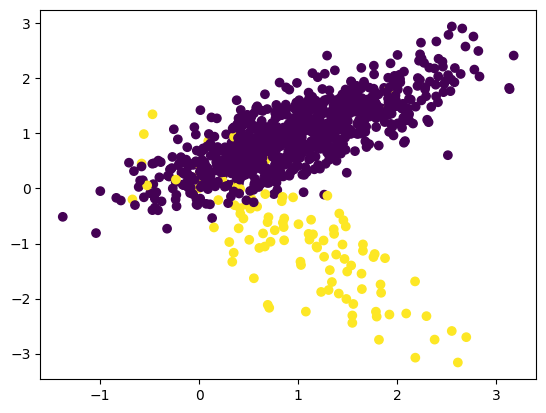

In [ ]:

import matplotlib.pyplot as plt
plt.scatter(final_df['f1'], final_df['f2'], c = final_df['target'])
# purple are majority datapoints
# yellow are minority datapoints

#now we will apply the smote on these datapoints and these will increasing

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE


In [ ]:
## transform the dataset

oversample = SMOTE()
X,y=oversample.fit_resample(final_df[['f1','f2']], final_df['target'])

When you apply SMOTE:

X, y = SMOTE( ).fit_resample(final_df[['f1','f2']], final_df['target'])


SMOTE looks at y (target column, 0 and 1)

Finds the minority class (usually 1)

Creates synthetic samples to balance 0s and 1s

In [ ]:
X.shape
# (1788, 2) becuase same minority class of 894 datappoints has been genrated and 894 * 2 = 1788

(1788, 2)

In [ ]:
y.shape

(1788,)

In [ ]:
y[y==0] #count majority class

,target
1,0
2,0
3,0
4,0
5,0
...,...
995,0
996,0
997,0
998,0


In [ ]:
#check the y value

len(y[y==0]) #count majority class

894

In [ ]:
len(y[y==1]) # now the minority data points are become 894 not 106

894

In [ ]:
#now again plot the datapoints

df1 = pd.DataFrame(X,columns =['f1', 'f2'])
df2 = pd.DataFrame(y,columns=['target']) # for output
oversample_df = pd.concat([df1,df2], axis=1)

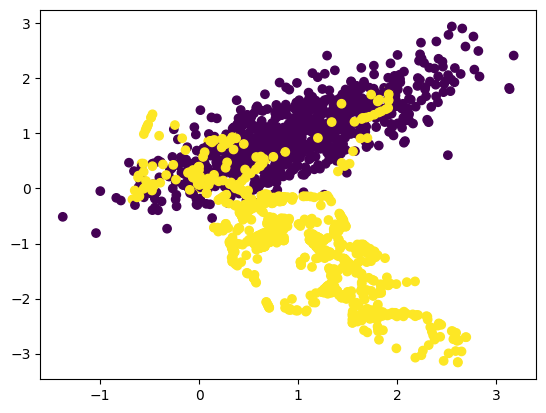

In [ ]:
plt.scatter(oversample_df['f1'], oversample_df['f2'], c = oversample_df['target'])